IMPORTING DATA LOADING AND PREPROCESSING LIBRARIES

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Flood_Prediction_NCR_Philippines.csv")

In [3]:
df

,Date,Location,Rainfall_mm,WaterLevel_m,SoilMoisture_pct,Elevation_m,FloodOccurrence
0,2016-01-01,Quezon City,12.0,0.5,15.3,43,0
1,2016-01-01,Marikina,10.6,1.8,23.2,15,0
2,2016-01-01,Manila,5.7,0.5,15.6,5,0
3,2016-01-01,Pasig,3.7,0.5,5.0,5,0
4,2016-01-02,Quezon City,3.4,0.5,13.3,43,0
...,...,...,...,...,...,...,...
7303,2020-12-30,Pasig,16.9,1.4,16.8,5,0
7304,2020-12-31,Quezon City,7.2,0.7,25.6,43,0
7305,2020-12-31,Marikina,4.8,1.3,9.6,15,0
7306,2020-12-31,Manila,7.4,1.0,11.9,5,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7308 entries, 0 to 7307
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7308 non-null   object 
 1   Location          7308 non-null   object 
 2   Rainfall_mm       7308 non-null   float64
 3   WaterLevel_m      7308 non-null   float64
 4   SoilMoisture_pct  7308 non-null   float64
 5   Elevation_m       7308 non-null   int64  
 6   FloodOccurrence   7308 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 399.8+ KB


In [5]:
df.describe()

,Rainfall_mm,WaterLevel_m,SoilMoisture_pct,Elevation_m,FloodOccurrence
count,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000
mean,10.052874,1.266379,15.184989,17.000000,0.018062
std,7.101769,0.902239,5.994044,15.557414,0.133186
min,0.100000,0.500000,5.000000,5.000000,0.000000
25%,4.900000,0.500000,10.900000,5.000000,0.000000
50%,8.400000,1.000000,14.900000,10.000000,0.000000
75%,13.500000,1.800000,19.100000,22.000000,0.000000
max,52.700000,6.400000,39.700000,43.000000,1.000000


In [6]:
#their is no null values in the data set
df.isna().sum()

Date                0
Location            0
Rainfall_mm         0
WaterLevel_m        0
SoilMoisture_pct    0
Elevation_m         0
FloodOccurrence     0
dtype: int64

In [7]:
df.columns

Index(['Date', 'Location', 'Rainfall_mm', 'WaterLevel_m', 'SoilMoisture_pct',
       'Elevation_m', 'FloodOccurrence'],
      dtype='object')

In [8]:
df["Location"].unique()

array(['Quezon City', 'Marikina', 'Manila', 'Pasig'], dtype=object)

In [9]:
#Here for the column "Location" we have to  convert the chategerical data to numeric data
df["Location"]=df["Location"].str.replace('Quezon City','0')
df["Location"]=df["Location"].str.replace('Marikina','1')
df["Location"]=df["Location"].str.replace('Manila','2')
df["Location"]=df["Location"].str.replace('Pasig','3')

In [10]:
df

,Date,Location,Rainfall_mm,WaterLevel_m,SoilMoisture_pct,Elevation_m,FloodOccurrence
0,2016-01-01,0,12.0,0.5,15.3,43,0
1,2016-01-01,1,10.6,1.8,23.2,15,0
2,2016-01-01,2,5.7,0.5,15.6,5,0
3,2016-01-01,3,3.7,0.5,5.0,5,0
4,2016-01-02,0,3.4,0.5,13.3,43,0
...,...,...,...,...,...,...,...
7303,2020-12-30,3,16.9,1.4,16.8,5,0
7304,2020-12-31,0,7.2,0.7,25.6,43,0
7305,2020-12-31,1,4.8,1.3,9.6,15,0
7306,2020-12-31,2,7.4,1.0,11.9,5,0


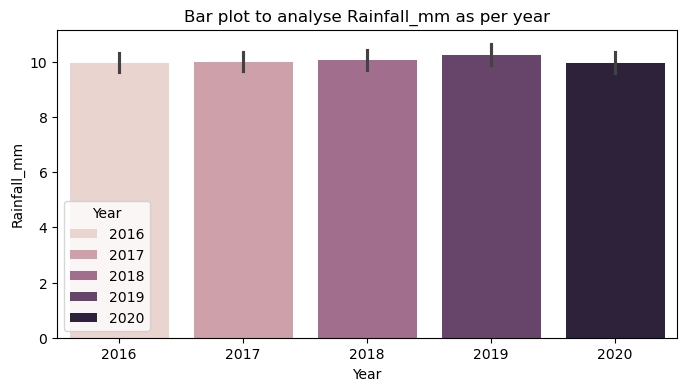

In [11]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year

plt.figure(figsize=(8,4))
sns.barplot(data=df,x="Year",y="Rainfall_mm",estimator="mean",hue="Year")
plt.title("Bar plot to analyse Rainfall_mm as per year")
plt.show()

IMPORTING THE LIBRARIES THAT HELPS TO  BUILD THE MODEL AND PREDICT THE MODEL ACCURACY

Here we considered the 4 libraries to build the model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

Checking the target value is balanced or not balanced data

Spliting the data into 2 parts inputs and outputs

In [13]:
df.columns

Index(['Date', 'Location', 'Rainfall_mm', 'WaterLevel_m', 'SoilMoisture_pct',
       'Elevation_m', 'FloodOccurrence', 'Year'],
      dtype='object')

In [14]:
#For input
x=df[['Rainfall_mm', 'WaterLevel_m', 'SoilMoisture_pct',
       'Elevation_m']]

#For output
y=df['FloodOccurrence']

In [15]:
#As we can see that the data is imbalanced or baised
df["FloodOccurrence"].value_counts()

FloodOccurrence
0    7176
1     132
Name: count, dtype: int64

In [16]:
#So to make the data balance we can either use over or under sampling method
#As for this data it already contain less rows so the over sampling is the best way for this
#Importing  the oversampling library

from imblearn.over_sampling import RandomOverSampler

In [17]:
#library calling for the oversampling  method
ovr_sample=RandomOverSampler()

In [18]:
x_resample,y_resample=ovr_sample.fit_resample(x,y)

In [19]:
print(len(x_resample))
print(len(y_resample)) #Now it is the balanced data

14352
14352


Spliting the input data into training and testing parts

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=2)

Models calling  here we using the all above mentioned 4 models

In [21]:
knn_model=KNeighborsClassifier()
nb_model=GaussianNB()
lr_model=LogisticRegression(max_iter=1000)
svm_model=SVC()

Model training

In [22]:
knn_model.fit(x_train,y_train)
nb_model.fit(x_train,y_train)
lr_model.fit(x_train,y_train)
svm_model.fit(x_train,y_train)

SVC()

Predicting the output value as name of y_prediction

In [23]:
y_pred_knn=knn_model.predict(x_test)
y_pred_nb=nb_model.predict(x_test)
y_pred_lr=lr_model.predict(x_test)
y_pred_svm=svm_model.predict(x_test)

Now calculating the accuracy score for all 4 model predicted output

In [24]:
print("for the KNN model the accuracy score is: ")
print(accuracy_score(y_test,y_pred_knn))
print("=============================================")
print("for the NB model the accuracy score is: ")
print(accuracy_score(y_test,y_pred_nb))
print("=============================================")
print("for the Logestic model the accuracy score is: ")
print(accuracy_score(y_test,y_pred_lr))
print("=============================================")
print("for the SVM model the accuracy score is: ")
print(accuracy_score(y_test,y_pred_svm))

for the KNN model the accuracy score is: 
0.9982584465343086
for the NB model the accuracy score is: 
0.9777081156391502
for the Logestic model the accuracy score is: 
0.9993033786137234
for the SVM model the accuracy score is: 
0.9940787182166493


As of we consider the NB model is the best because remaining 3 model are over fit

Model Loading and Dumping

we used jobib library here

In [25]:
import joblib

joblib.dump(nb_model,"model.pkl")

['model.pkl']

In [26]:
joblib.load("model.pkl")

GaussianNB()

In [30]:
nb_model.predict([[12.0,0.5,15.3,43]])

C:\Users\Varun\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)